# Handwritten Digit Recognition


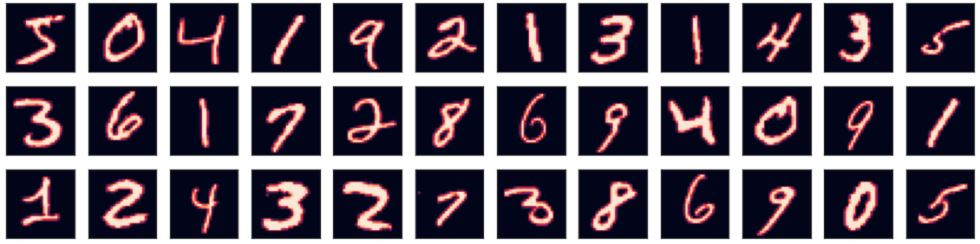

## Problem Statement :
> The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

## Dataset : 
> The MNIST dataset : This is probably one of the most popular datasets among machine learning and deep learning enthusiasts. The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.

## Evaluation Metrics :
### Accuracy:
### Precision :
### Recall :
### F1-Score :

## Imoprt Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
%load_ext tensorboard
#tensorboard_callback = tf.keras.callbacks.TensorBoard("myLogs")

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD 
from keras.utils import plot_model
from keras.applications.xception import Xception
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Network visualization
'''
pip install pydot, pip install pydotplus, pip install graphviz
'''
from keras.utils.vis_utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
#!rm -rf ./myLogs/

# Step1 :  Load the data

In [4]:
from tensorflow.keras.datasets import mnist
# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()
print (x_train.shape)

(60000, 28, 28)


In [7]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Class Distribution

C:\Users\rkies\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


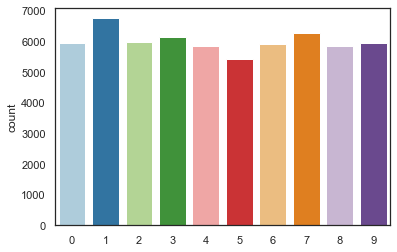

In [4]:
import seaborn as sns
pd.Series(y_train)
sns.set(style='white', context='notebook', palette='Paired')
sns.countplot(y_train)
#pd.DataFrame(y_train.value_counts()).T

# Step2 :  Explore dataset

In [5]:
print(f"Training Set => X_train : {x_train.shape}; y_train : {y_train.shape}")
print(f"Testing Set  => X_test  : {x_test.shape};  y_test  : {y_test.shape}")


Training Set => X_train : (60000, 28, 28); y_train : (60000,)
Testing Set  => X_test  : (10000, 28, 28);  y_test  : (10000,)


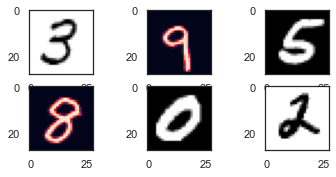

In [6]:
# importing matplotlib
# You'll need to run this twice as matplotlib doesn't generate the plot in the same cell where it was imported
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('binary'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])#, cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])#, cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('binary'))

# Display out plots
plt.show()

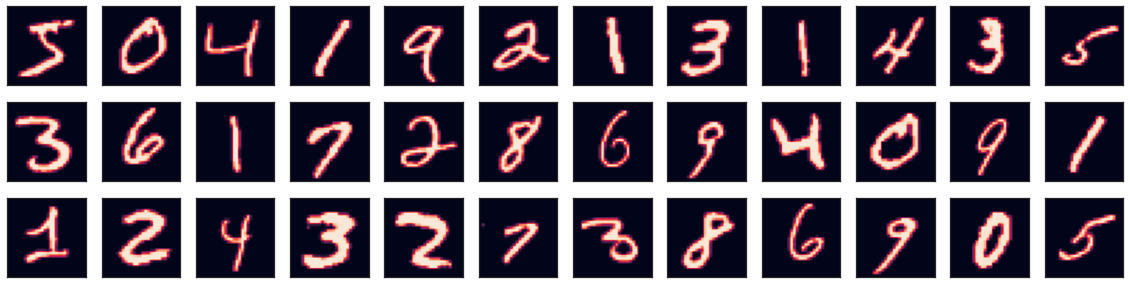

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

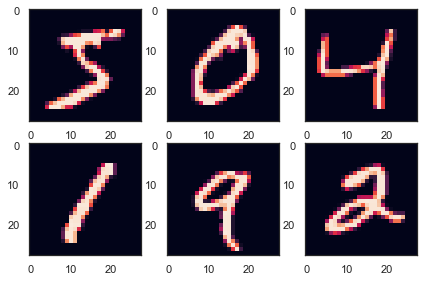

In [8]:
import matplotlib.pyplot as plt
#pd.Series(x_train)
# Some examples
plt.figure(figsize=(7, 7))

for i in range(6):  
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])

In [9]:
# show pixel values
#print(x_train[0])
print(y_train[0])

5


# Step3 : Preprocess data

In [10]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#x_train = np.array(x_train).reshape(-1, img_rows, img_rows, 1)
#x_test = np.array(x_test).reshape(-1, img_rows, img_rows, 1)


# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

print(f"Training samples Size : {x_train.shape[0]} Images")
print(f"Testing samples  : {x_test.shape[0]}  Images")
print("***"*15)

print(f"Training samples Shape : {x_train.shape}")
print(f"Testing samples Shape  : {x_test.shape}")



Training samples Size : 60000 Images
Testing samples  : 10000  Images
*********************************************
Training samples Shape : (60000, 28, 28, 1)
Testing samples Shape  : (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [12]:
# Look at our raw data
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
print(f"Training Set => x_train : {x_train.shape}; y_train : {y_train.shape}")
print(f"Testing Set  => x_test  : {x_test.shape};  y_test  : {y_test.shape}")

Training Set => x_train : (60000, 28, 28, 1); y_train : (60000, 10)
Testing Set  => x_test  : (10000, 28, 28, 1);  y_test  : (10000, 10)


# Step4 : Build and Train the Model

In [14]:
# create model
model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


## => Model Architecture

In [15]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

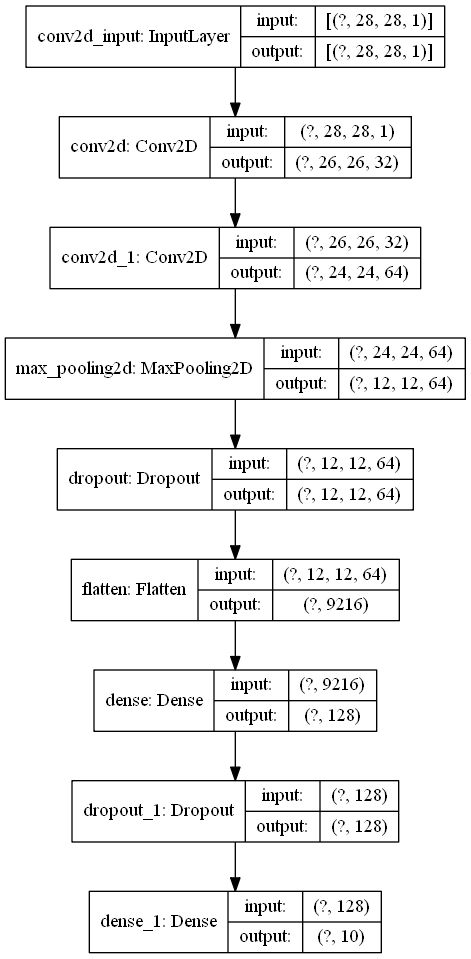

In [16]:
# Model Visualization
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#plot_model(model, to_file='model.png')

## => Model Compilation

In [17]:
model.compile(optimizer=SGD(0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
# optimizer=SGD(0.01)

## => Model Training

In [18]:
from keras.callbacks import ModelCheckpoint
ckpt_model = 'models/mnist_handDigit.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
tensorboard_callback = [tensorboard_callback]


In [19]:

## Test GPU
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [20]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
          y_train, 
          epochs=epochs,
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          verbose=1,
          callbacks=[callbacks_list,tensorboard_callback])


Epoch 1/10
   1/1875 [..............................] - ETA: 0s - loss: 2.3218 - accuracy: 0.1250WARNING:tensorflow:From C:\Users\rkies\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5980 - accuracy: 0.8125 - val_loss: 0.2043 - val_accuracy: 0.9413
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2846 - accuracy: 0.9142 - val_loss: 0.1393 - val_accuracy: 0.9598
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2112 - accuracy: 0.9371 - val_loss: 0.0998 - val_accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1620 - accuracy: 0.9521 - val_loss: 0.0807 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 

### ==> Visualize Model with Tensorboard

In [21]:
%tensorboard --logdir logs/fit
# http://localhost:6006/
# A lire : TensorBoard.dev (Host and share your ML experiment results)

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 17524.

# Step5 : Model Evalution

### ==> Training and Testing Accuracy

In [22]:
print("Evaluation on training set")
print("============================")
score_train = model.evaluate(x_train, y_train, verbose=0)
print('Train loss         :', score_train[0])
print('Train accuracy     : %.2f%% ' % round(score_train[1]*100,2),'\n')

print("Evaluation on testing set")
print("============================")
score_test = model.evaluate(x_test, y_test, verbose=0)
print('Test loss           :', score_test[0])
print('Test accuracy       : %.2f%% '% round(score_test[1]*100,2), '\n')
print("Generalization Error")
print("============================")
print("Generalization Error: %.2f%%" % (100-score_test[1]*100))

Evaluation on training set
Train loss         : 0.03664056956768036
Train accuracy     : 98.89%  

Evaluation on testing set
Test loss           : 0.044461771845817566
Test accuracy       : 98.55%  

Generalization Error
Generalization Error: 1.45%


In [23]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
print("Test score accuracy is:","{:.2f}%".format(accuracy_score(y_test, pred.round())*100))

Test score accuracy is: 98.35%


### ==> Classification Report

In [24]:
print(classification_report(y_test, pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.98      0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.98      0.99     10000
 samples avg       0.98      0.98      0.98     10000



C:\Users\rkies\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ==> Confusion Matrix

#### Model Accuracy and Loss Plot

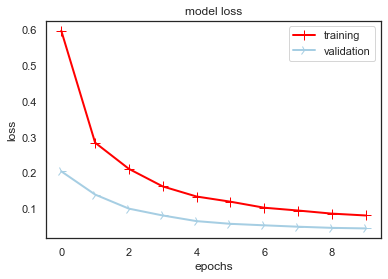

In [25]:
line1=plt.plot(history.history['loss'], color='r')
line2=plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.legend(['training', 'validation'], loc='upper right')
plt.sa
plt.show()

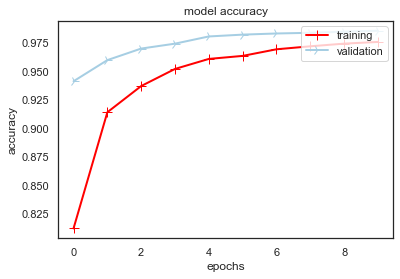

In [26]:
line1=plt.plot(history.history['accuracy'], color='r')
line2=plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

#### Confusion Matrix

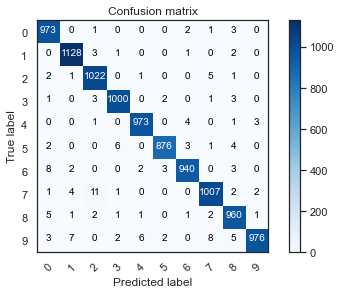

In [27]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 


# Step6 : Prediction

### => Prediction-1

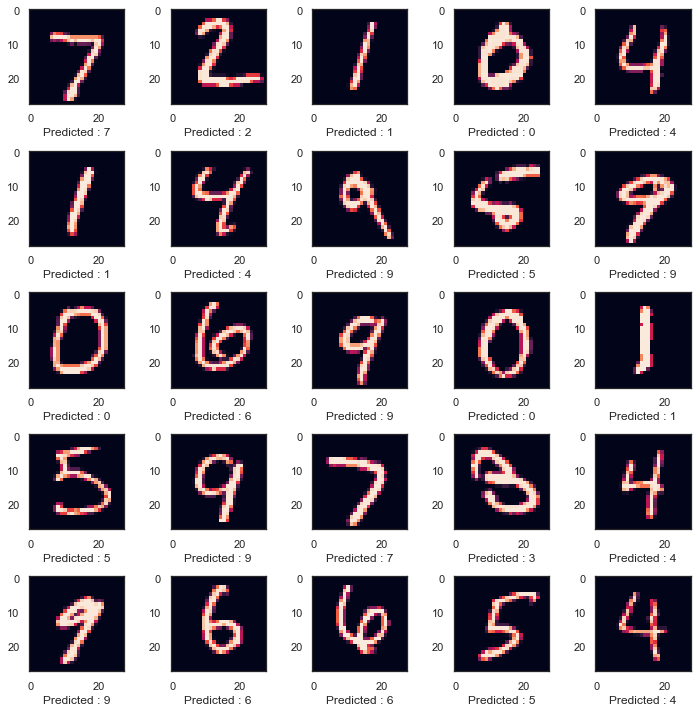

In [28]:
rows = 5
cols = 5

plt.figure(figsize=(10,10))
for index in range(rows*cols):
    img = x_test[index].reshape(1, 28, 28, 1)
    pred = np.argmax(model.predict(img))
    plt.subplot(rows, cols, index+1)
    plt.imshow(x_test[index][:,:,0])
    plt.xlabel('Predicted : {}'.format(pred))

plt.tight_layout()
plt.show()

### => Prediction-2

Enter Image Index : 5
Predicted Digit :  1


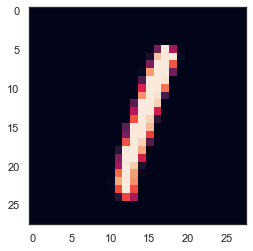

In [29]:
def pred_img(img_index=0):
    idx = int(input('Enter Image Index : '))
    g = plt.imshow(x_test[idx][:,:,0])
    # predict results
    # select the indix with the maximum probability
    results = np.argmax(model.predict(x_test[[idx]]))
    return print("Predicted Digit : ",results)
pred_img()    

### => Prediction-3

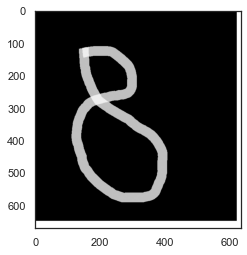

In [33]:
import cv2
imge = cv2.imread('D:/1_Handwritten_Digit_Recognition/illust_and_doc/mon8.png')
plt.imshow(imge)

In [34]:
gray = cv2.cvtColor(imge, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
newimg = tf.keras.utils.normalize(resized, axis=1)
row_size = resized.shape[0]
col_size = resized.shape[1]
newimg = np.array(newimg).reshape(-1,row_size, col_size,1)

print(f'Original image Shape : {imge.shape}')
print(f'Gray image Shape     : {gray.shape}')
print(f'Resized image Shape  : {resized.shape}')
print(f'Input image Shape    : {newimg.shape}')

Original image Shape : (670, 633, 3)
Gray image Shape     : (670, 633)
Resized image Shape  : (28, 28)
Input image Shape    : (1, 28, 28, 1)


In [35]:
# pred content probability list
pred = model.predict(newimg)

In [36]:
results = np.argmax(pred)
results

5

### => Predict with OpenCV

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model = load_model('models/mnist-hand_digit.h5')

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

### ==> Save the model

In [38]:
model.save('Saved_Models/cnn_hand_W_digit98.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


# Step7 : Improve the model

A few things could be done to improve the results:

+ Different model architecture (num of nodes, etc)
+ Dropout
+ Adaptive learning rate
+ Data Augmentation
+ and more

# Step7 : Model Deployment

## => With opencv-1

+ handwritten-digit-rec-img-app-Opcv1.py

C:\Users\rkies\Documents\Deep-Learning-RkD\DL-CNN-RkD\Ap-Handwritten-Digit-Recognition-Opcv

## => With opencv-2

+ handwritten-digit-rec-vid-app-Opcv2.py

C:\Users\rkies\Documents\Deep-Learning-RkD\DL-CNN-RkD\Ap-Handwritten-Digit-Recognition-Opcv

### ==> Tkinter

+ handwritten-digit-rec-app-tk.py

C:\Users\rkies\Documents\Deep-Learning-RkD\DL-CNN-RkD\Ap-Handwritten-Digit-Recognition-Tk

### ==> Flask

+ app.py

C:\Users\rkies\Documents\Deep-Learning-RkD\DL-CNN-RkD\Ap-Handwritten-Digit-Recognition-Fk

### ==> Streamlit

### ==> Tensorflow.Js

# Kaggle Submission

In [ ]:
results =[]
for index in range(28000):
    img = test_data[index].reshape(1, 28, 28, 1)
    pred = np.argmax(model.predict(img))
    results.append(pred)

In [ ]:
submission = pd.DataFrame()
submission['ImageId'] = [i for i in range(1, 28001)]
submission['Label'] = results

In [ ]:
submission.to_csv('./my_submission.csv', index=False)